---
# Introduction

## Overall Preview

This notebook will consist of creating model that will predict, whether a passenger is satisfied with the flight based on the survey given to them.

This project will be carried out using Python for data cleaning, data exploration analysis, modeling, predicting, and visualization. 

Key libraries that will be used here :
- `pandas`, `numpy` - For dataset storage and manipulation
- `matplotlib`, `seaborn` - For visualization
- `scipy` - For analysis
- `pickle` - For export and import model
- `scikit-learn` - For imputing, modeling. and evaluating
- `statsmodels` - For assumption test
- `xgboost` - boosting algorithm based on tree based algorithm.
- `mlanalyser` - My own script consist of function for cleaner notebook

please download necessary library, or by running `pip install requirements.txt` to run the project.

Additionally, This model will be deployed on `HuggingFace` that is more convenient for user to use. For the deployment please refer to this [link](https://huggingface.co/spaces/vikesaki/AirlineSatisfactionProject)

Also deployment has been done as well in `StreamLit`, which can be accessed from this [link](https://airlinecustomersatisfactionproject.streamlit.app/)

## Background

Airline market is a competitive market. In 2025, the global airline industry is expected to generate a total revenue of $979 billion, according to IATA. <br><br>
Customer satistfaction can affect the rate of income, as the higher the satistfaction, there is higher chance that the customer will return, or even recommend someone else. <br><br>

## Dataset Description

dataset used is `Airline Passenger Satisfaction` taken from Kaggle.

Explanation is taken from the `Content` section in the original dataset posted in kaggle.

for original dataset can be seen in this [link](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data).

| Column Name                         | Data Type | Description                                                                 |
|------------------------------------|-----------|-----------------------------------------------------------------------------|
| id                                 | INT64     | Unique identifier for each passenger                                       |
| Gender                             | STRING    | Gender of the passenger (Female, Male)                                     |
| Customer Type                      | STRING    | Loyalty classification (Loyal customer, Disloyal customer)                 |
| Age                                | INT64     | Age of the passenger                                                       |
| Type of Travel                     | STRING    | Purpose of travel (Personal Travel, Business Travel)                       |
| Class                              | STRING    | Class of travel (Business, Eco, Eco Plus)                                  |
| Flight Distance                    | INT64     | Distance of the flight in miles                                            |
| Inflight wifi service              | INT64     | Satisfaction with inflight wifi (0: Not Applicable, 1–5 scale)             |
| Departure/Arrival time convenient  | INT64     | Satisfaction with departure/arrival times (1–5 scale)                      |
| Ease of Online booking             | INT64     | Satisfaction with online booking (1–5 scale)                               |
| Gate location                      | INT64     | Satisfaction with gate location (1–5 scale)                                |
| Food and drink                     | INT64     | Satisfaction with food and drink (1–5 scale)                               |
| Online boarding                    | INT64     | Satisfaction with online boarding process (1–5 scale)                      |
| Seat comfort                       | INT64     | Satisfaction with seat comfort (1–5 scale)                                 |
| Inflight entertainment             | INT64     | Satisfaction with inflight entertainment (1–5 scale)                       |
| On-board service                   | INT64     | Satisfaction with overall onboard service (1–5 scale)                      |
| Leg room service                   | INT64     | Satisfaction with leg room (1–5 scale)                                     |
| Baggage handling                   | INT64     | Satisfaction with baggage handling (1–5 scale)                             |
| Checkin service                    | INT64     | Satisfaction with check-in service (1–5 scale)                             |
| Inflight service                   | INT64     | Satisfaction with inflight service (1–5 scale)                             |
| Cleanliness                        | INT64     | Satisfaction with cleanliness of the flight (1–5 scale)                    |
| Departure Delay in Minutes         | INT64     | Delay at departure in minutes                                              |
| Arrival Delay in Minutes           | FLOAT64   | Delay at arrival in minutes                                                |
| satisfaction                       | STRING    | Overall satisfaction (Satisfaction, Neutral or Dissatisfaction)           |


for more information about the dataset, please refer to `Exploratory Data Analysis` section


---
# Importing Libraries

In [1]:
# For automatically reload the personal python script
%load_ext autoreload
%autoreload 2

In [2]:
# Dataset storage
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model saving
import pickle

# ML
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from scipy.stats import uniform, randint

# ML Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Personal script
import mlanalyzer as mla

---
# Data Loading

## Importing data to local dataframe

In [3]:
train = pd.read_csv('train.csv', index_col=0)

In [4]:
test = pd.read_csv('test.csv', index_col=0)

## Checking Data Split Between Train and Test

As the dataset already splitted from beginning, we can check the test/train split

In [5]:
test_length = len(test)
train_length = len(train)

test_percentage = test_length / (test_length + train_length) * 100
print(test_percentage)

20.0


The data provided is splitted into 80/20

In [6]:
train['satisfaction'].value_counts(normalize=True)

satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64

In [7]:
test['satisfaction'].value_counts(normalize=True)

satisfaction
neutral or dissatisfied    0.561018
satisfied                  0.438982
Name: proportion, dtype: float64

Both of the data is not balanced. with 56% for `neutral or dissatisfied` and 43% for `satisfied`. This show that accuracy might not be the best parameter for scoring the model later on.

### Dataset Information

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

- this dataset consist of 22 feature with one target.
- the target from the dataset is satisfaction.
- in total there is 103904 data train.
- there is missing value in this dataset, on `Arrival Delay in Minutes`.
- data is splitted between 4 categorical (in np.object) and the rest in numeric (float and integer)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int64  


- in total there is 25976 data test.
- there is missing value in this dataset, on `Arrival Delay in Minutes`.

In [10]:
train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In average :
- Passenger age is around **39 years old**.
- They travel an average flight distance of **1,189 miles**.
- For service satisfaction (on a scale of 0–5):
  - **Inflight wifi service** is rated **2.73** on average.
  - **Departure/Arrival time convenience** is rated **3.06**.
  - **Ease of online booking** is rated **2.76**.
  - **Gate location** gets an average score of **2.98**.
  - **Food and drink** is rated **3.20**.
  - **Online boarding** is rated **3.25**.
  - **Seat comfort** has an average of **3.44**.
  - **Inflight entertainment** scores **3.36**.
  - **On-board service** gets **3.38**.
  - **Leg room service** is rated **3.35**.
  - **Baggage handling** has the highest average rating at **3.63**.
  - **Check-in service** is rated **3.30**.
  - **Inflight service** has **3.64**.
  - **Cleanliness** is rated **3.29**.
- The average **departure delay** is **14.8 minutes**.
- The average **arrival delay** is **15.2 minutes**.

Head and tail preview for train data

In [11]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [12]:
train.tail(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


## Handling Duplicate

### Checking Duplicate

In [13]:
train.duplicated().sum()

np.int64(0)

This dataset does not have any duplicate. it means that every data came from different passenger from different flight, that is shown from the unique id.

We can check the actual feature duplicate, as id will not be used for the model later on.

In [14]:
train.drop(columns=['id'], axis=1).duplicated().sum()

np.int64(0)

this is perfect as there is no duplicate, which means that we dont need to manage duplicated data that is redundant and not.

since we dont want to remove duplicated data, that has different outcome, for example : <br>
For every passenger from same plane with same review, have different outcome, some consider it as satisfaction some not.

## Feature grouping

- *unique = `id`* <br>
This column is a unique identifier for each passenger and does not contribute to the prediction task. It will be excluded from modeling.

- *target_columns = `satisfaction`* <br>
This is the classification label we want to predict. It has two classes: satisfied and neutral or dissatisfied.

- *discrete_columns* <br>
These are survey-based rating columns (on a 1–5 Likert scale). 
Although they are numeric, the values represent discrete levels of satisfaction.

- *numerical_columns*<br>
These are continuous numerical variables.

- *ordinal_columns = `Class`*<br>
`Class` is an ordered categorical feature showing the class of the passenger while traveling onboard. it follow the hierarchy of : <br>
Economy < Economy Plus < Business

- *categories_columns* <br>
This is a categorical feature that have no ordering, such as `Gender`

In [15]:
train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
unique = 'id'
target_columns = 'satisfaction'
discrete_columns = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
ordinal_columns = ['Class']
categories_columns = list(train.select_dtypes(include='object').columns)
categories_columns.remove(ordinal_columns[0])
numerical_columns = list(train.select_dtypes('number').columns)

if unique in numerical_columns:
    numerical_columns.remove(unique)
if unique in categories_columns:
    categories_columns.remove(unique)
    
if target_columns in numerical_columns:
    numerical_columns.remove(target_columns)
if target_columns in categories_columns:
    categories_columns.remove(target_columns)
    
if discrete_columns in numerical_columns:
    numerical_columns.remove(discrete_columns)

In [17]:
for name in discrete_columns:
    if name in numerical_columns:
        numerical_columns.remove(name)

## Unique value preview

In [18]:
for name in numerical_columns:
    print(f'{name} : {train[name].nunique()}')

Age : 75
Flight Distance : 3802
Departure Delay in Minutes : 446
Arrival Delay in Minutes : 455


- the range of age is 75
- There is 3802 different route, shown by the difference distance
- there is 466 delayed departure and 455 delayed arrival

In [19]:
for name in discrete_columns:
    print(f'{name} : {train[name].nunique()}')

Inflight wifi service : 6
Departure/Arrival time convenient : 6
Ease of Online booking : 6
Gate location : 6
Food and drink : 6
Online boarding : 6
Seat comfort : 6
Inflight entertainment : 6
On-board service : 6
Leg room service : 6
Baggage handling : 5
Checkin service : 6
Inflight service : 6
Cleanliness : 6


- All the range from 0 until 6, with 0 being unapplicable

In [20]:
for name in categories_columns:
    print(f'{name} : {train[name].nunique()}')

Gender : 2
Customer Type : 2
Type of Travel : 2


- There is only 2 gender recorded in the dataset
- There is only 2 type of customer recorded in the dataset
- There is only 2 type of travel recorded in the dataset

In [21]:
for name in ordinal_columns:
    print(f'{name} : {train[name].nunique()}')

Class : 3


There is 3 different class across all the flight survey record

---
# Exploratory Data Analysis (EDA)

## What is the distribution of customer satisfaction?

To understand the difference between the satisfaction across all the surveyed passenger.

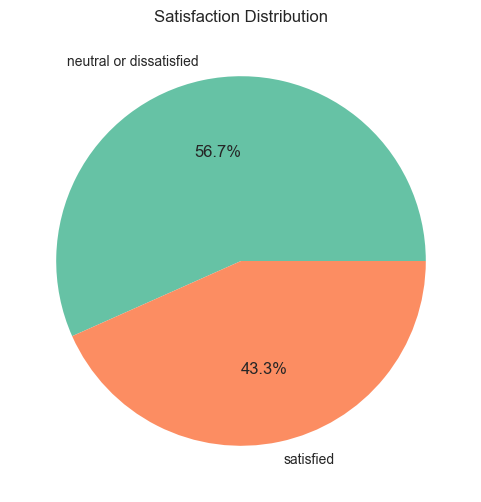

In [22]:
satisfaction_counts = train['satisfaction'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    satisfaction_counts, 
    labels=train['satisfaction'].unique(), # type: ignore
    autopct='%1.1f%%', 
    colors=sns.color_palette('Set2')
)
plt.title('Satisfaction Distribution')
plt.show()

From the graph, 57% of the passenger is either neutral or dissatisfied, while the other 43% is satisfied with the airline service.

## Does satisfaction vary by Gender?

Now to check whether a certain gender have more tendency for being satisfied, or not. a graph also has been done.

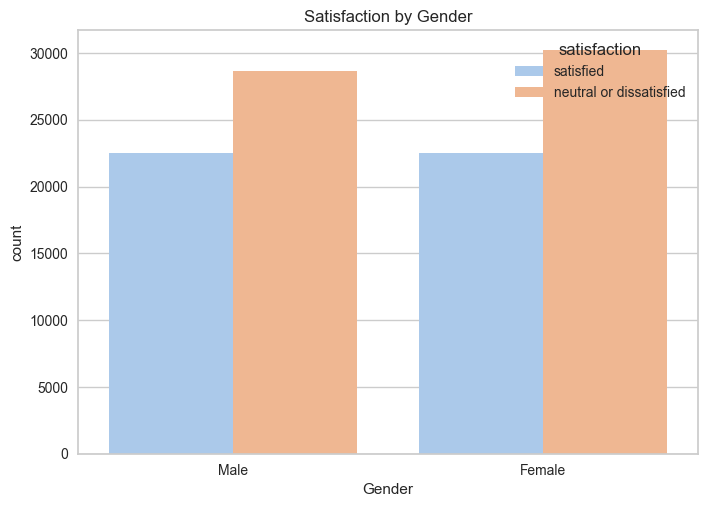

In [23]:
sns.countplot(data=train, x='Gender', hue='satisfaction', palette='pastel',hue_order=['satisfied', 'neutral or dissatisfied'])
plt.title('Satisfaction by Gender')
plt.show()

From the graph, the amount of satisfied passenger between gender is almost the same, around 22.500. but Female passenger have higher number of dissatisfied customer compared to male. despite the difference is not that big.

## How does Age relate to Satisfaction?

The visualization has been done to answer the rate of satisfaction across ages.

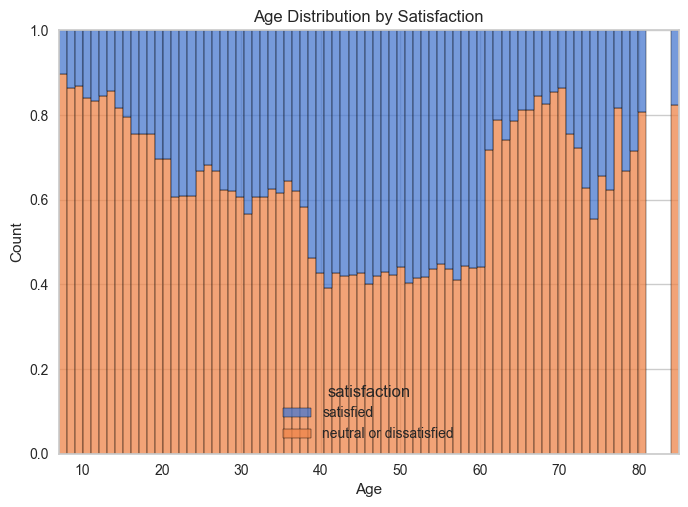

In [ ]:
sns.histplot(data=train, x='Age', hue='satisfaction', multiple='fill', palette='muted', hue_order=['satisfied', 'neutral or dissatisfied'])
plt.title('Age Distribution by Satisfaction')
plt.show()

- **Younger Passengers (Under 20)**: This group tends to have a higher dissatisfaction rate, as shown by the dominance of the orange bars.
- **Middle-Aged Passengers (20–40)**: This segment shows a relatively balanced mix, with a slight tendency towards dissatisfaction.
- **Older Passengers (40–60)**: Satisfaction tends to increase in this range, with a greater proportion of blue bars (satisfied customers).
- **Extremes (60+)**: These bins have fewer data points, but appear mostly dissatisfied — although the high variability suggests the sample size is small.

## Does Class impact satisfaction level?

This bar chart displays the relationship between **travel class** and **customer satisfaction**.

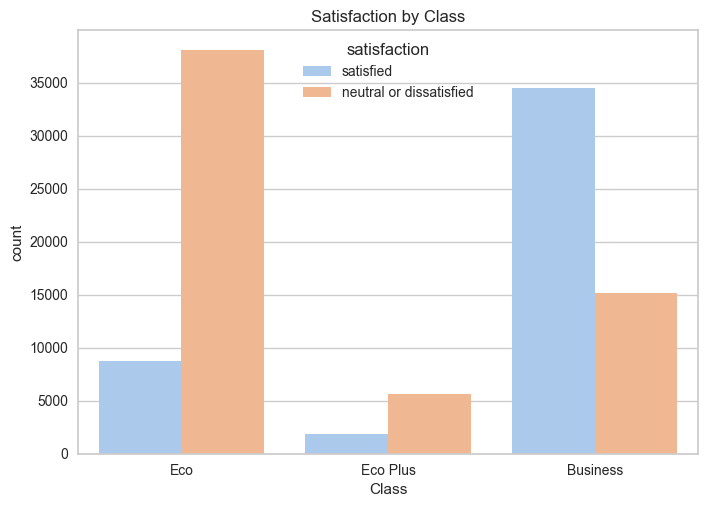

In [25]:
sns.countplot(data=train, x='Class', hue='satisfaction', palette='pastel', order=['Eco', 'Eco Plus', 'Business'], hue_order=['satisfied', 'neutral or dissatisfied'])
plt.title('Satisfaction by Class')
plt.show()

- **Business class** passengers are more likely to be satisfied, with a much higher count of satisfied customers than dissatisfied ones.
- **Economy class** has a high number of dissatisfied or neutral passengers, indicating a potential need for service improvements in this tier.
- **Eco Plus** shows a moderate dissatisfaction rate but has a small overall count, suggesting either fewer customers or limited availability.

## What’s the relationship between Departure Delay and Arrival Delay?

This will explain whether a delay in either departure or arrival means that its also a delay on the other side.

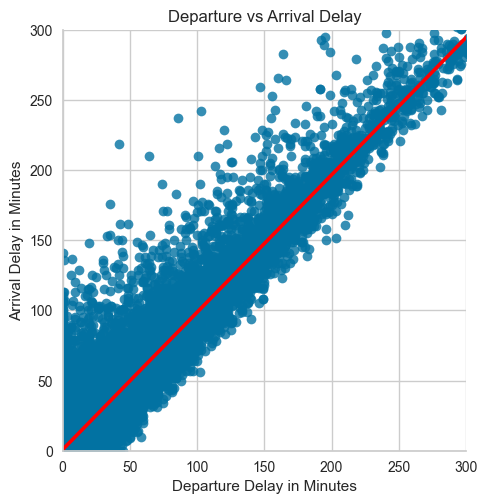

In [26]:
sns.lmplot(data=train, x='Departure Delay in Minutes', y='Arrival Delay in Minutes',  line_kws={'color': 'red'})
plt.title('Departure vs Arrival Delay')
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.show()

Based on the visualization, the delay is almost perfectly linear, meaning that *if a flight is delayed, or arrive late, its departure also will be delayed*

## Does longer flight have higher delayed flight?

This visualization is crucial for understanding how flight delays behave across different flight distance ranges (`0–500`, `501–1000`, `1001–1500`, `1501–2000`, `2000+` miles).<Br> 
By segmenting delay data by flight length, we can assess whether longer flights tend to experience more severe delays or if delays are more prevalent in shorter domestic routes. 

In [27]:
combined = train.copy(deep=True)
combined['Total Delay'] = combined['Departure Delay in Minutes'].fillna(0) + combined['Arrival Delay in Minutes'].fillna(0)

In [28]:
distance_bins = [0, 500, 1000, 1500, 2000, combined['Flight Distance'].max()]
distance_labels = ['0–500', '501–1000', '1001–1500', '1501–2000', '2000+']
combined['FlightRange'] = pd.cut(combined['Flight Distance'], bins=distance_bins, labels=distance_labels)

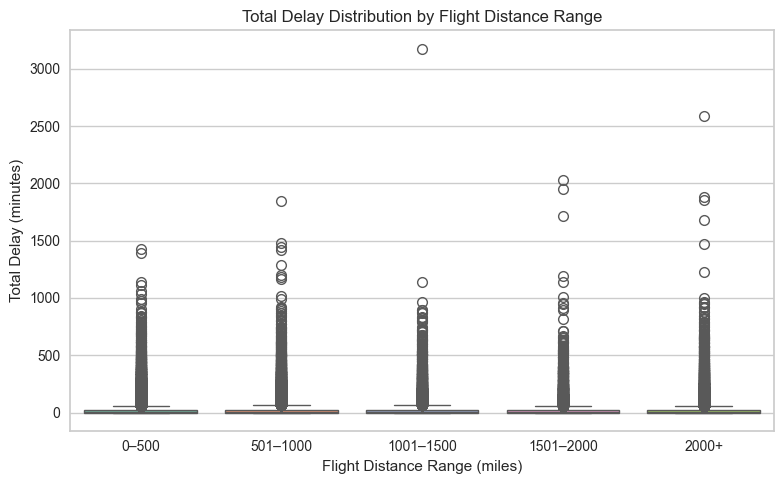

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=combined, x='FlightRange', y='Total Delay', hue='FlightRange', palette='Set2')
plt.title('Total Delay Distribution by Flight Distance Range')
plt.xlabel('Flight Distance Range (miles)')
plt.ylabel('Total Delay (minutes)')
plt.tight_layout()
plt.show()

- Across all distance categories, the **median delay remains fairly low**, suggesting most flights are not severely delayed.
- The **outliers increase slightly in frequency and magnitude** in longer-distance flights (especially `2000+`), possibly due to the compounding effect of multiple potential delay sources (e.g., international customs, refueling, weather).

## Does Check-in service rating differ between satisfied and dissatisfied customers?

Illustrates how customer satisfaction relates to the rating given for the check-in service. It helps identify whether better check-in experiences lead to higher overall satisfaction.

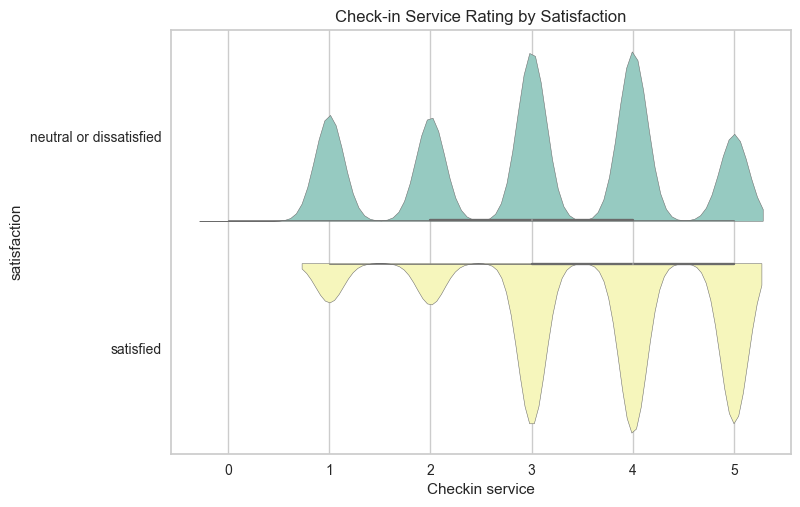

In [30]:
sns.violinplot(
    data=train,
    x='Checkin service',
    y='satisfaction',
    hue='satisfaction',
    palette='Set3',
    split=True
)
plt.title('Check-in Service Rating by Satisfaction')
plt.show()

- **Dissatisfied passengers** are more likely to give low to medium ratings (1 to 3) for check-in service.
- **Satisfied passengers** are more concentrated at higher ratings (4 and 5), especially rating 5.
- There is a visible shift in density between the two groups—indicating that better check-in service correlates strongly with overall satisfaction.

## Which features scored with rating correlate most with Satisfaction?

This could show which feature from the surveys have the highest correlation - meaning that it has the biggest impact on the satisfaction itself.

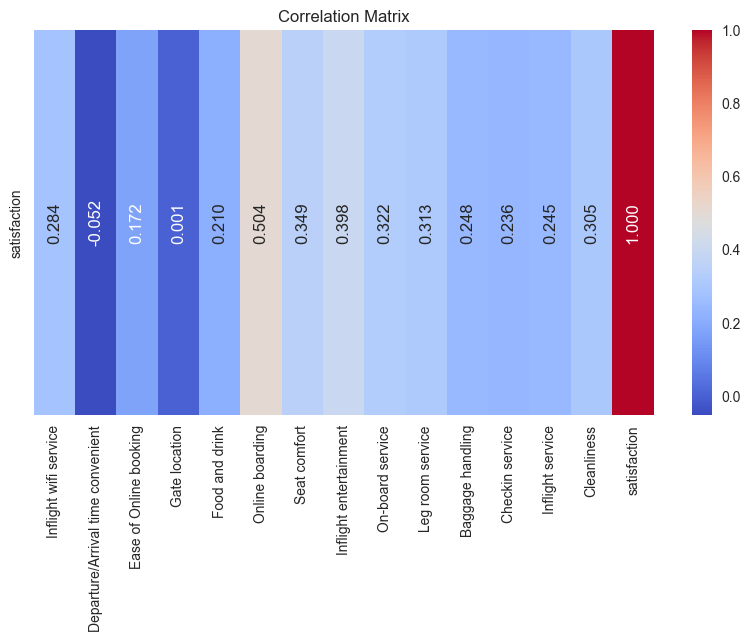

In [31]:
df_encoded = train.copy()
df_encoded['satisfaction'] = df_encoded['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
selected_cols = discrete_columns + ['satisfaction']
mla.correlation_matrix(df_encoded[selected_cols], target=target_columns, annotation='vertical')

- **Online boarding (0.504)**  
  Passengers who experienced smooth or effective boarding procedures tend to rate their satisfaction higher than others.

- **Inflight entertainment (0.398)**  
  Quality and availability of entertainment significantly impact overall satisfaction.

- **Seat comfort (0.349)**  
  Comfortable seating contributes positively to the passenger experience.

- **On-board service (0.322)**  
  The behavior and support from onboard staff matter.

- **Leg room service (0.313)**  
  Adequate space and comfort during the flight are appreciated.

- **Cleanliness (0.305)**  
  Clean cabins and surroundings are key to leaving a good impression.

- **Inflight wifi service (0.284)**  
  Connectivity access also plays a moderate role.

- **Baggage handling (0.248)**  
  Reliable baggage service positively impacts satisfaction.

- **Check-in service (0.245)**  
  Efficient check-in boosts the customer experience.

- **Inflight service (0.236)**  
  General inflight services, such as crew responsiveness and assistance, moderately affect satisfaction.

- **Food and drink (0.210)**  
  Catering services moderately enhance satisfaction.

- **Ease of Online booking (0.172)**  
  A user-friendly booking process helps but has less impact compared to in-flight factors.

- **Gate location (0.001)**  
  Almost no effect on satisfaction.

- **Departure/Arrival time convenient (-0.052)**  
  Surprisingly, timing convenience has a slightly negative correlation, possibly due to delays.



---
# Feature Engineering

## Changing Datatype

Minutes is better in float, as the number is continous (minutes can be half, like half a minutes), and for consistency also, since the other time is in float

In [32]:
train['Departure Delay in Minutes'].dtype

dtype('int64')

In [33]:
train['Departure Delay in Minutes'] = train['Departure Delay in Minutes'].astype(dtype='float')
train['Departure Delay in Minutes'].dtype

dtype('float64')

In [34]:
test['Departure Delay in Minutes'] = test['Departure Delay in Minutes'].astype(dtype='float')
test['Departure Delay in Minutes'].dtype

dtype('float64')

## Splitting Feature and Target

In [35]:
x_train = train.drop([target_columns], axis=1)
y_train = train[target_columns]
y_train

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

In [36]:
x_test = test.drop([target_columns], axis=1)
y_test = test[target_columns]

Target need to be labeled, in this case, using label encoder with : 
- 1 - Satisfied
- 0 - Neutral or Dissatisfied

In [37]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([0, 0, 1, ..., 0, 0, 0], shape=(103904,))

In [38]:
y_test = le.fit_transform(y_test)
y_test

array([1, 1, 0, ..., 0, 1, 0], shape=(25976,))

## Encoding Ordinal

As class in flight have order, such as 'Business' class is higher than 'Eco'. this need to be treated as ordinal.

In [39]:
x_train['Class'].value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

From here we can see that there is only 3 type of class with 'Business' being the highest, followed by 'Eco Plus' and 'Eco'. <br>
This will be handled in pipeline later on.

## NaN Handling

### Checking Missing Value

In [40]:
mla.missing_data_percentage(train)

,Missing Count,Missing %
Arrival Delay in Minutes,310,0.298352


We have missing value in this dataset, in column `Arrival Delay in Minutes` <br>
to handle this we need to understand whether this is MCAR, MAR or MNAR

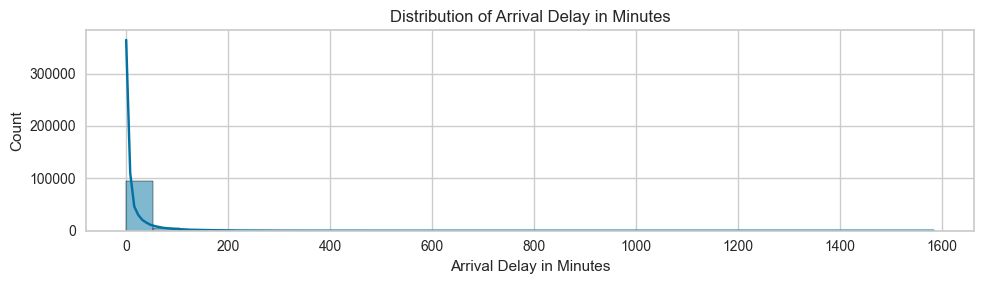

In [41]:
mla.distribution_plots(x_train, 'Arrival Delay in Minutes')

As the data is highly skewed we can check the correlation with other feature with `spearman` algorithm. <br>
from here we can see if the missing value have any correlation with the others, which means we can treat it as Missing At Random (MAR)

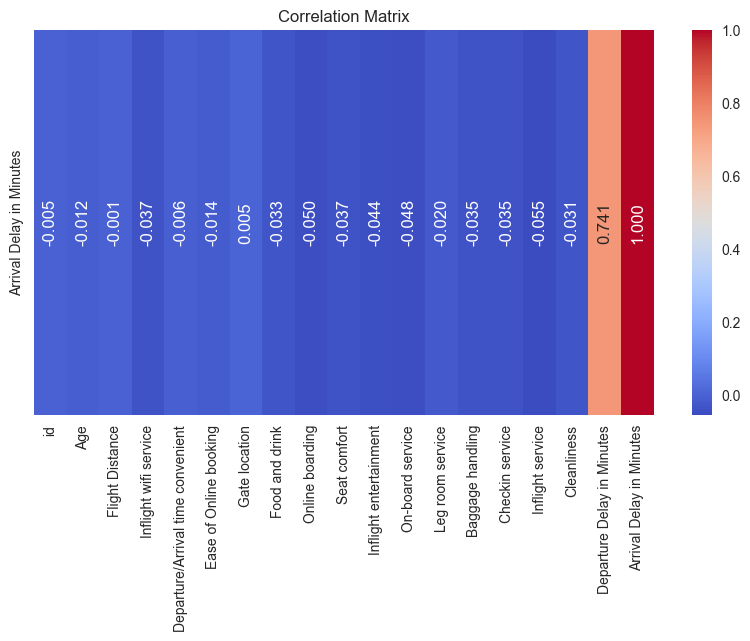

In [42]:
mla.correlation_matrix(df=x_train, method='spearman',target='Arrival Delay in Minutes', annotation='vertical')

This feature have correlation with `Departure Delay in Minutes`. this is logical as a delay in departure usually will make the arrival also delayed. we can check it even further with grouping.

In [43]:
mla.column_summary_by_missing(x_train, target='Arrival Delay in Minutes') #type:ignore

,mean_with_nan,mean_without_nan,difference,percentage_difference
feature,,,,
id,64924.210502,64942.428625,-18.218123,-0.028053
Age,39.379706,39.380466,-0.000760,-0.001929
Flight Distance,1189.448375,1189.325202,0.123173,0.010357
Inflight wifi service,2.729683,2.729753,-0.000070,-0.002547
Departure/Arrival time convenient,3.060296,3.060081,0.000215,0.007037
Ease of Online booking,2.756901,2.756984,-0.000083,-0.003025
Gate location,2.976883,2.977026,-0.000143,-0.004810
Food and drink,3.202129,3.202126,0.000003,0.000103
Online boarding,3.250375,3.250497,-0.000122,-0.003747


As we can see there is difference when we remove the NaN row from the dataset on `Departure Delay in Minutes`, this strengthen the fact that both have correlation

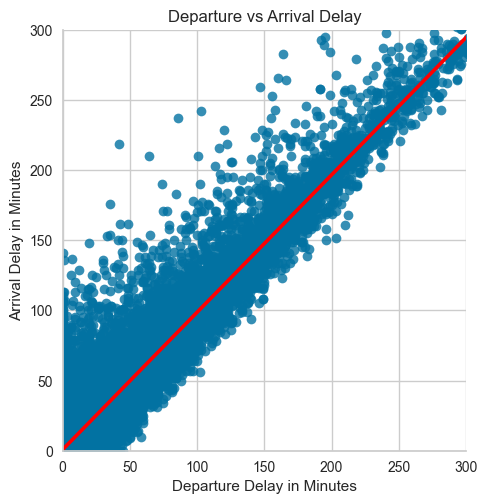

In [44]:
sns.lmplot(data=train, x='Departure Delay in Minutes', y='Arrival Delay in Minutes',  line_kws={'color': 'red'})
plt.title('Departure vs Arrival Delay')
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.show()

From visualization its also visible that there is pattern here, if there is delay in departure, then there will be delay in arrival as well. <br>
So this NaN will be considered as **Missing At Random**, and will be filled with KNImputer algorithm later in the pipeline.

### Handling Outlier

in this project, **outlier will stay inside the dataset**, as this is a natural outlier, and we want to preserve as much pattern as possible, without changing the dataset distribution. as both of algorithm will be used is considered robust to outlier.

for preview we can see the outlier for each numerical

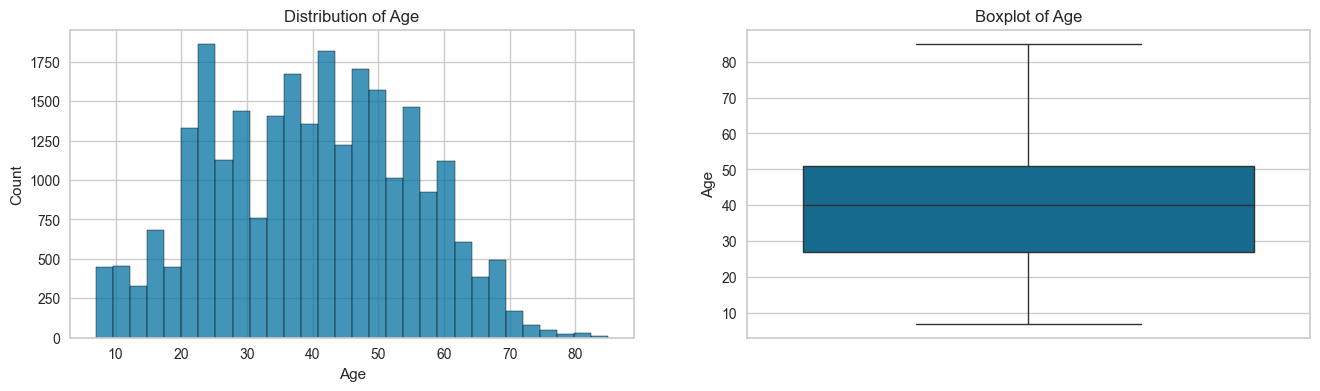

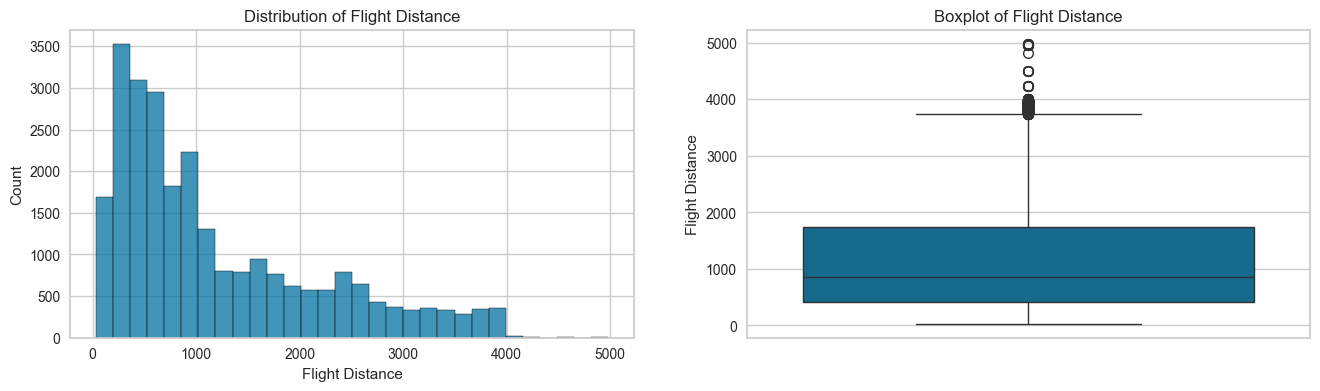

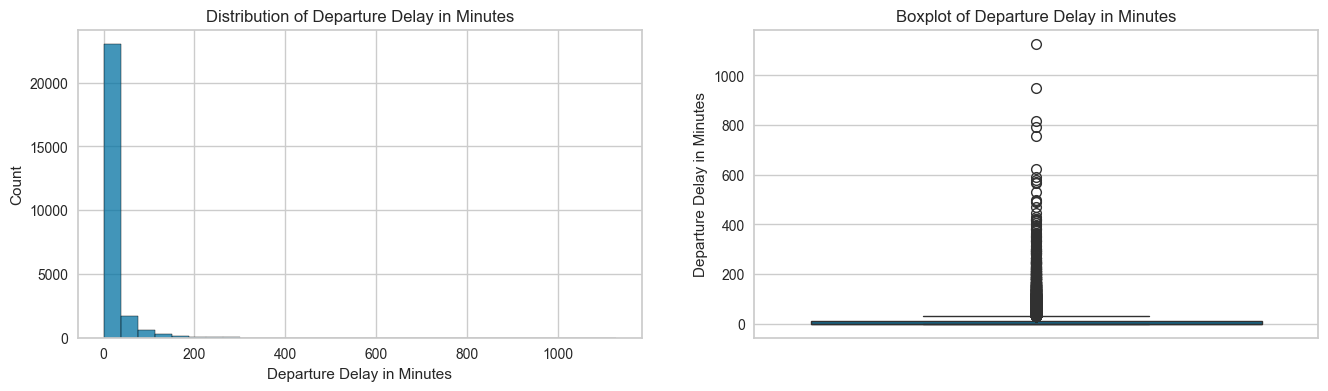

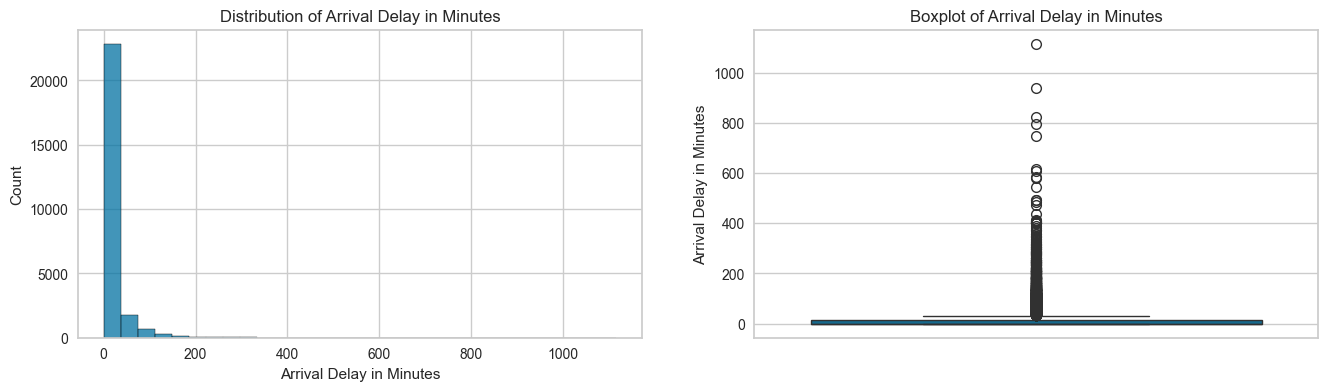

In [45]:
for name in list(numerical_columns):
    mla.diagnostic_plots(x_test, name)

for justification for outlier
- `Age` doesnt have outlier, and from the spread, the oldest passenger is above 80 but under 90, and it is normal.
- `Flight Distance`, there is several flight that reach more than 4000 miles, some reaching 5000 miles. its normal, in fact there is multiple flight with higher than 5000, such as [Los Angeles (LAX) → Tokyo](https://www.travelmath.com/distance/from/LAX/to/Tokyo,+Japan) and [Doha → New York (NYC)](https://www.travelmath.com/distance/from/Doha,+Qatar/to/New+York,+NY)
- `Departure Delay in Minutes` and `Departure Delay in Minutes`. from the visualization most flight have under 0 to 50 in delay, with somre reaching more than 1000 minutes (around 16-17 hours). it is certainly not normal, but it is in fact longer delay happened in the past, for example [43 hours delay of TUIfly Punta Cana to Amsterdam in Nov 2016](https://nltimes.nl/2016/12/29/longest-flight-delay-2016-lasted-43-hours)

this should not be a big problem as we have several model to try, and some of the model is robust to outlier.

## Feature Selection

### Numerical Continous

Spearman will be used because some of the data is skewed for all numerical features.

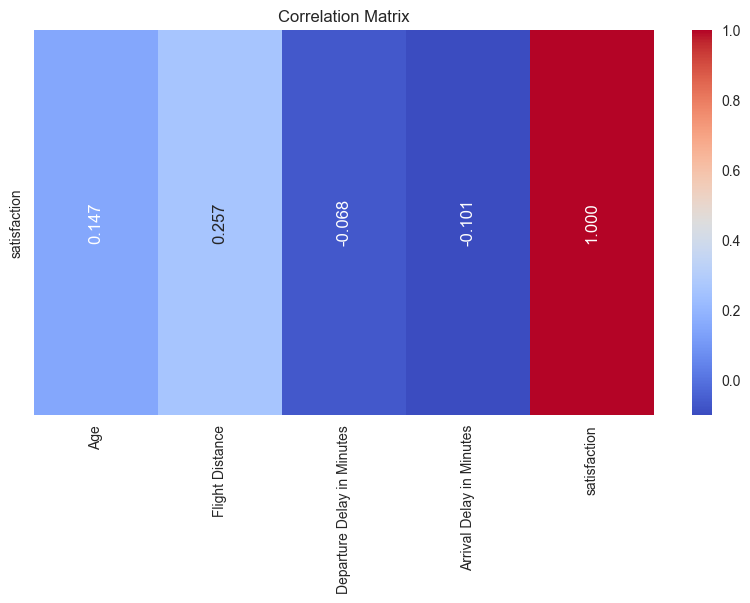

In [46]:
selected_cols = numerical_columns + ['satisfaction']
mla.correlation_matrix(df=df_encoded[selected_cols] ,method='spearman', target=target_columns, annotation='vertical')

From here we can see that at least all feature have correlation, despite its small. with delays have negative correlation with the passenger satisfaction.

### Numerical Discrete

Spearman will be used because some of the data is skewed, and since its also assuming ranking as in this data, the range is 0-5, with 5 being the best.

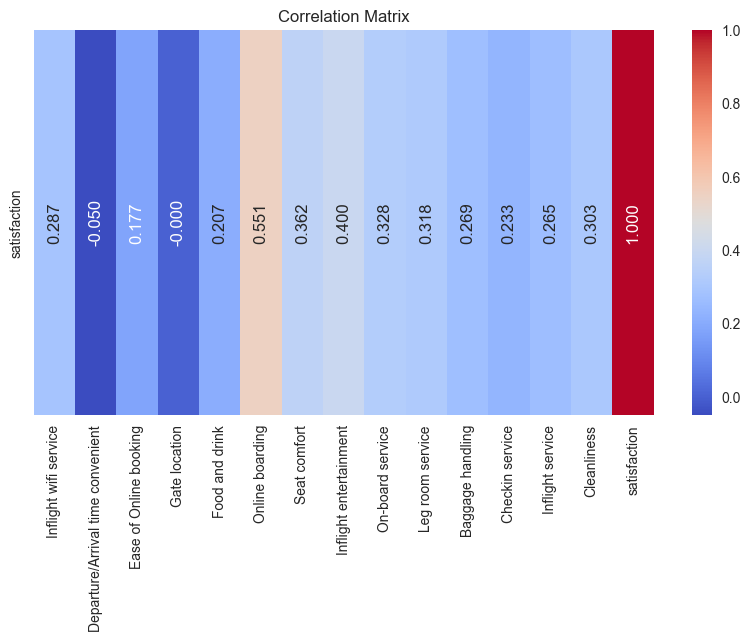

In [47]:
selected_cols = discrete_columns + ['satisfaction']
mla.correlation_matrix(df=df_encoded[selected_cols] ,method='spearman', target=target_columns, annotation='vertical')

From here we can see that at least all feature have correlation, despite its small. `Gate-Location` almost have perfectly no correlation, but this will not be excluded, since *i will use PCE on both numerical continous and discrete*

### Categorical Nominal

In [48]:
mla.categorical_association_test(train, categories_columns, target_col=target_columns)

,column,chi2 score,p_value,cramers_v,interpretation
0,Gender,15.44,0.000085,0.012192,associated
1,Customer Type,3657.28,0.000000,0.187613,associated
2,Type of Travel,20945.23,0.000000,0.448979,associated


p_value always showing 0.0 showing that our dataset is really large and the number got rounded to 0. <br>
the cramer v test also show that almost all the feature have weak to moderate association

### Categorical Ordinal

In [49]:
train['Class'].isna().sum()

np.int64(0)

In [50]:
df_encoded['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [51]:
custom_order = [['Eco', 'Eco Plus', 'Business']]

# Apply OrdinalEncoder with your order
oe = OrdinalEncoder(categories=custom_order)
df_encoded['Class'] = oe.fit_transform(df_encoded[['Class']])


In [52]:
selected_cols = ordinal_columns + ['satisfaction']
df_encoded[selected_cols].head(5)

,Class,satisfaction
0,1.0,0
1,2.0,0
2,2.0,1
3,2.0,0
4,2.0,1


Spearman will be used because it is also assuming ranking (as business class is better than eco), the range is 0-2, with 2 (Business Class) being the best.

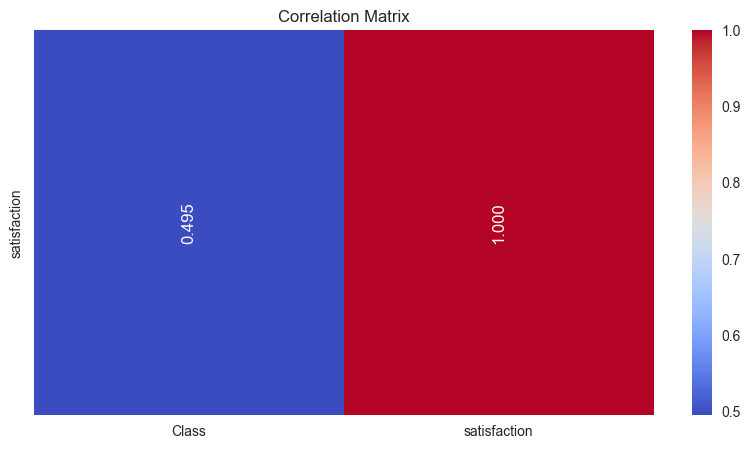

In [53]:
mla.correlation_matrix(df=df_encoded[selected_cols] ,method='spearman', target=target_columns, annotation='vertical')

From here we can see that `Class` have moderate positive correlation with `satisfaction`, meaning that the higher the class, the more likely they to get satisfied with the service.

## Cardinality Check

In [54]:
mla.cardinality(x_test, categories_columns, multi=True)

,column name,number of unique,unique value
0,Gender,2,"[Female, Male]"
1,Customer Type,2,"[Loyal Customer, disloyal Customer]"
2,Type of Travel,2,"[Business travel, Personal Travel]"


All of the categorical nominal only have 2 unique feature, which means its a low cardinality, and will not makes the model overfit.

## Dimensionality Reduction

As the dataset mostly filled with numerical (on continous, discrete, and ordinal), PCA can be used to reduce the dimensionality. this will make the model more efficient as we will feed not all the feature. 

**Discrete and Ordinal will be also included** as both assume ranking, and have linear relationship, (as 0 is worse than 1). both can be used in PCA, according to IBM *Data sets that contain discrete attributes require a numeric encoding of their discrete values as a prerequisite.* ([source](https://www.ibm.com/docs/en/ias?topic=pca-usage))

For another justification for using PCA, this paper has done a research about [Principal Components Analysis for Ordinal Data](https://www.researchgate.net/publication/381280495_Principal_Components_Analysis_for_Ordinal_Data_using_R)

To understand, what percentage of variance we want to retain,and how much pca needed, a 'dummy' pca has been made, for the decision making process <br>
Actual model will use pipeline.

In [55]:
imputer = KNNImputer()
selected_cols = ordinal_columns + numerical_columns + discrete_columns
dataset_imputed = imputer.fit_transform(df_encoded[selected_cols])

In [56]:
stscaler = StandardScaler()
dataset_scaled = stscaler.fit_transform(dataset_imputed)
dataset_scaled

array([[-0.02918708, -1.7452793 , -0.73153876, ...,  0.5497986 ,
         1.15643582,  1.30586973],
       [ 1.00939303, -0.95136024, -0.95718354, ..., -1.82101248,
         0.30584786, -1.74229153],
       [ 1.00939303, -0.88520032, -0.04758435, ...,  0.5497986 ,
         0.30584786,  1.30586973],
       ...,
       [ 1.00939303, -0.62056063,  0.8078601 , ...,  1.34006895,
         1.15643582,  0.54382941],
       [-1.06776718, -1.14984   , -0.18999128, ...,  1.34006895,
         0.30584786, -1.74229153],
       [ 1.00939303, -0.8190404 ,  0.53508063, ...,  0.5497986 ,
        -0.54474009, -1.74229153]], shape=(103904, 19))

In [57]:
visual_pca = PCA()
visual_pca.fit(dataset_scaled)
data_pca = visual_pca.transform(dataset_scaled)
print(data_pca.shape)

(103904, 19)


### Retained PCA for 95% variance

We want to retain 95% of the variance, we can check how much pca needed for this.

In [58]:
cumsum = np.cumsum(visual_pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

np.int64(15)

15 PCA is needed here, which means that we reduced the amount of feature by 4

### Explained Cumulative Variance

Other way to find the PCA is using Explained Cumulative Variance. by using 95% threshold, we can see which pca is enough for the threshold

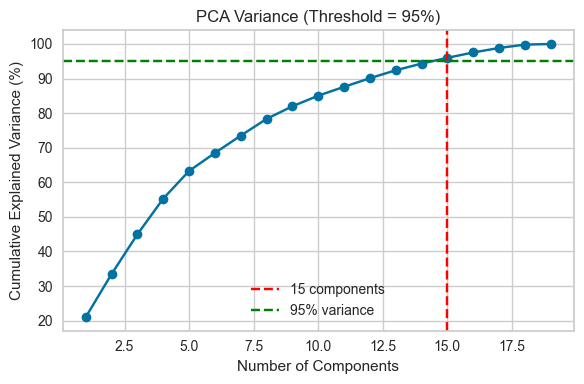

In [59]:
mla.plot_pca(visual_pca, threshold=95)

12 pca is the lowest pca that can retain more or equal to 95% cumulative explained variance.

### Eigenvalue

Eigenvalue show on which pca, the pca can not provide/simulate all of the feature.
Under 1 eigenvalue is the usual threshold

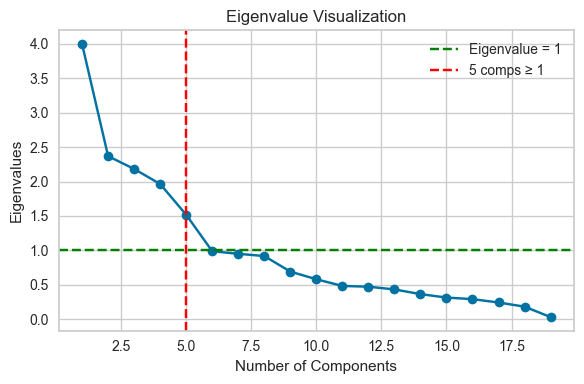

In [60]:
mla.plot_pca_eigenvalue(visual_pca, threshold=1)

From here, higher than 5th pca, the pca will not bring all the feature, but its still needed as we want 95% of variance

# Model Definition

Algorithm that will be used is:
- **Logistic Regression**: A basic classification algorithm that models the probability of a binary outcome using a linear decision boundary. It is efficient and interpretable, suitable for linearly separable data.
- **Decision Tree**: A non-linear model that splits data based on feature values to make decisions. This model is well-suited for handling complex relationships and mixed data types without extensive preprocessing.
- **K-Nearest Neighbors (KNN)**: A distance-based algorithm that classifies a data point based on the majority label among its closest neighbors. It is simple but sensitive to scaling and works best on smaller datasets.
- **Support Vector Machine (SVM)**: A powerful algorithm that finds the optimal hyperplane to separate classes. It is effective for high-dimensional data but computationally heavy on large datasets.
- **XGBoost**: An advanced ensemble method based on gradient boosting. It builds decision trees sequentially to minimize errors and is known for its high accuracy and ability to handle missing data.

| Model                            | Advantages                                                                                                               | Disadvantages                                                                                       |
| -------------------------------- | ------------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------- |
| **Logistic Regression**          | - Simple and interpretable<br>- Fast and efficient<br>- Works well with linearly separable data                          | - Assumes linear boundary<br>- Struggles with complex relationships<br>- Sensitive to outliers      |
| **Decision Tree**                | - Captures non-linear patterns<br>- Easy to interpret<br>- Handles both numerical and categorical data                   | - Overfits easily<br>- Unstable to small data changes<br>- Can be biased with imbalanced data       |
| **K-Nearest Neighbors**          | - No training phase<br>- Simple and intuitive<br>- Good for small datasets with clear structure                          | - Computationally expensive on large data<br>- Sensitive to irrelevant features and scaling         |
| **Support Vector Machine (SVM)** | - Effective in high-dimensional spaces<br>- Robust to overfitting in certain kernels<br>- Works well with clear margins  | - High computational cost<br>- Difficult to tune<br>- Doesn’t scale well with large datasets        |
| **XGBoost**                      | - Very powerful and accurate<br>- Built-in handling of missing values<br>- Handles non-linearities and interactions well | - Requires tuning<br>- Harder to interpret<br>- More computational resources needed during training |



In [ ]:
train['satisfaction'].value_counts(normalize=True)

satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64

As data is still imbalanced, the metrics will be used for calculation is `F1 score` as it gave best balance between catching both satisfied/dissatisfied.

## Preprocessor (Pipeline)

This pipeline will include missing value handling, scaling/encoding, and modeling for the model itself. <Br>
For missing value handling (please refer to `missing value handling`), *KNNImputer* will be used for numerical and discrete features, while *SimpleImputer* will be used for categorical and ordinal features. this will be the last measure to make sure the data is correct on input, while later on deployment, all the data need to be exist<br>
For scaling, *StandardScaler* will be applied after imputation to numerical, discrete, and ordinal features. *Standard Scaler* is used since its the best for PCA, Dimensionality Reduction Algorithm that using average, and *Standard Scaler* is scaling according to the average, and standard deviation, while still considering the variance. <br>*OrdinalEncoder* is used specifically for ordinal categorical variables based on a predefined order, and *OneHotEncoder* will be used for nominal categorical features.<br>
Additionally, dimensionality reduction is handled by *PCA(n_components=0.95)* applied to all scaled numeric inputs.

In [61]:
ordinal_order = [['Eco', 'Eco Plus', 'Business']]

# Numerical & Discrete Columns
num_disc_imputer = ColumnTransformer([
    ('num_disc', KNNImputer(n_neighbors=3), numerical_columns + discrete_columns)
])

# Ordinal Columns
ordinal_imputer_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=ordinal_order))
])

ordinal_preprocessor = ColumnTransformer([
    ('ord', ordinal_imputer_encoder, ordinal_columns)
])

numeric_ordinal_scaler = ColumnTransformer([
    ('num_disc', KNNImputer(n_neighbors=3), numerical_columns + discrete_columns),
    ('ord', ordinal_imputer_encoder, ordinal_columns)
])

numeric_scaled_pipeline = Pipeline([
    ('impute_encode', numeric_ordinal_scaler),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

# Categorical Columns
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# --- Final Preprocessor ---
full_preprocessor = ColumnTransformer([
    ('numeric_pca', numeric_scaled_pipeline, numerical_columns + discrete_columns + ordinal_columns),
    ('cat', categorical_pipeline, categories_columns)
])

full_preprocessor

ColumnTransformer(transformers=[('numeric_pca',
                                 Pipeline(steps=[('impute_encode',
                                                  ColumnTransformer(transformers=[('num_disc',
                                                                                   KNNImputer(n_neighbors=3),
                                                                                   ['Age',
                                                                                    'Flight '
                                                                                    'Distance',
                                                                                    'Departure '
                                                                                    'Delay '
                                                                                    'in '
                                                                                    'Minutes',
                                                                                    'Arrival '
                                                                                    'Delay '
                                                                                    'in '
                                                                                    'Minutes',
                                                                                    'Inflight '
                                                                                    'wifi '
                                                                                    'service',
                                                                                    'Departure/Arrival '
                                                                                    'time '
                                                                                    'convenient',
                                                                                    'Ease '
                                                                                    'of '
                                                                                    'Online '
                                                                                    'booking',
                                                                                    'Gate '
                                                                                    'location',
                                                                                    'Fo...
                                  'Food and drink', 'Online boarding',
                                  'Seat comfort', 'Inflight entertainment',
                                  'On-board service', 'Leg room service',
                                  'Baggage handling', 'Checkin service',
                                  'Inflight service', 'Cleanliness', 'Class']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Gender', 'Customer Type',
                                  'Type of Travel'])])

As for the algorithm, DecisionTree, RandomForest, along with other models such as SVM, KNN, and XGBoost will be used for evaluation. <br>
Using 42 as the random state.

In [62]:
randomstate = 42

# KNN
KNN_pipeline = Pipeline(steps=[
    ('preprocessing', full_preprocessor),
    ('classifier', KNeighborsClassifier())
])

# SVM
SVM_pipeline = Pipeline(steps=[
    ('preprocessing', full_preprocessor),
    ('classifier', SVC(probability=True, random_state=randomstate))
])

# Decision Tree
DT_pipeline = Pipeline(steps=[
    ('preprocessing', full_preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=randomstate))
])

# Random Forest
RF_pipeline = Pipeline(steps=[
    ('preprocessing', full_preprocessor),
    ('classifier', RandomForestClassifier(random_state=randomstate))
])

# XGBoost
XGB_pipeline = Pipeline(steps=[
    ('preprocessing', full_preprocessor),
    ('classifier', XGBClassifier(random_state=randomstate))
])


---
# Model Training

## KNN Training

In [63]:
KNN_pipeline.fit(x_train, y_train) #type:ignore

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_pca',
                                                  Pipeline(steps=[('impute_encode',
                                                                   ColumnTransformer(transformers=[('num_disc',
                                                                                                    KNNImputer(n_neighbors=3),
                                                                                                    ['Age',
                                                                                                     'Flight '
                                                                                                     'Distance',
                                                                                                     'Departure '
                                                                                                     'Delay '
                                                                                                     'in '
                                                                                                     'Minutes',
                                                                                                     'Arrival '
                                                                                                     'Delay '
                                                                                                     'in '
                                                                                                     'Minutes',
                                                                                                     'Inflight '
                                                                                                     'wifi '
                                                                                                     'service',
                                                                                                     'Departure/Arrival '
                                                                                                     'time '
                                                                                                     'convenient',
                                                                                                     'Ease '
                                                                                                     'of '
                                                                                                     'Onli...
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness', 'Class']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel'])])),
                ('classifier', KNeighborsClassifier())])

#### K-Fold Validation

we can check the how stable both model in predicting f1_score (as its the parameter that we want to use)

In [64]:
cv_report = {}
cv_report = mla.cross_val_report(cv_report, KNN_pipeline, x_train, y_train, 'KNN Classifier', 'f1')
pd.DataFrame(cv_report)

,KNN Classifier
f1 - Mean - Cross Validation,0.907666
f1 - Std - Cross Validation,0.003028
f1 - Range - Cross Validation,0.9046 - 0.9107


from here we have the expectation for f1 on prediction later, around 0.90 and 0.91, this algorithm itself is stable all across the cross valisation with 0.003 standard deviation.

## SVM Training

In [65]:
SVM_pipeline.fit(x_train, y_train) #type:ignore

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_pca',
                                                  Pipeline(steps=[('impute_encode',
                                                                   ColumnTransformer(transformers=[('num_disc',
                                                                                                    KNNImputer(n_neighbors=3),
                                                                                                    ['Age',
                                                                                                     'Flight '
                                                                                                     'Distance',
                                                                                                     'Departure '
                                                                                                     'Delay '
                                                                                                     'in '
                                                                                                     'Minutes',
                                                                                                     'Arrival '
                                                                                                     'Delay '
                                                                                                     'in '
                                                                                                     'Minutes',
                                                                                                     'Inflight '
                                                                                                     'wifi '
                                                                                                     'service',
                                                                                                     'Departure/Arrival '
                                                                                                     'time '
                                                                                                     'convenient',
                                                                                                     'Ease '
                                                                                                     'of '
                                                                                                     'Onli...
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness', 'Class']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel'])])),
                ('classifier', SVC(probability=True, random_state=42))])

#### K-Fold Validation

we can check the how stable both model in predicting f1_score (as its the parameter that we want to use)

In [66]:
cv_report = mla.cross_val_report(cv_report, SVM_pipeline, x_train, y_train, 'SVM Classifier', 'f1')
pd.DataFrame(cv_report)

,KNN Classifier,SVM Classifier
f1 - Mean - Cross Validation,0.907666,0.936741
f1 - Std - Cross Validation,0.003028,0.00135
f1 - Range - Cross Validation,0.9046 - 0.9107,0.9354 - 0.9381


from here we have the expectation for f1 on prediction later, around 0.93, this algorithm itself is stable all across the cross valisation with 0.001 standard deviation. <br>
On the downside, as SVM is computationally expensive, the training took 20 minutes, and the cross validation took 58 minutes.

## Decision Tree Training

In [67]:
DT_pipeline.fit(x_train, y_train) #type:ignore

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_pca',
                                                  Pipeline(steps=[('impute_encode',
                                                                   ColumnTransformer(transformers=[('num_disc',
                                                                                                    KNNImputer(n_neighbors=3),
                                                                                                    ['Age',
                                                                                                     'Flight '
                                                                                                     'Distance',
                                                                                                     'Departure '
                                                                                                     'Delay '
                                                                                                     'in '
                                                                                                     'Minutes',
                                                                                                     'Arrival '
                                                                                                     'Delay '
                                                                                                     'in '
                                                                                                     'Minutes',
                                                                                                     'Inflight '
                                                                                                     'wifi '
                                                                                                     'service',
                                                                                                     'Departure/Arrival '
                                                                                                     'time '
                                                                                                     'convenient',
                                                                                                     'Ease '
                                                                                                     'of '
                                                                                                     'Onli...
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness', 'Class']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

#### K-Fold Validation

we can check the how stable both model in predicting f1_score (as its the parameter that we want to use)

In [68]:
cv_report = mla.cross_val_report(cv_report, DT_pipeline, x_train, y_train, 'Decision Tree', 'f1')
pd.DataFrame(cv_report)

,KNN Classifier,SVM Classifier,Decision Tree
f1 - Mean - Cross Validation,0.907666,0.936741,0.887497
f1 - Std - Cross Validation,0.003028,0.00135,0.001662
f1 - Range - Cross Validation,0.9046 - 0.9107,0.9354 - 0.9381,0.8858 - 0.8892


from here we have the expectation for f1 on prediction later, around 0.88, this algorithm itself is have 0.001 standard deviation across the 5 cross validation.

## Random Forest Training

In [69]:
RF_pipeline.fit(x_train, y_train) #type:ignore

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_pca',
                                                  Pipeline(steps=[('impute_encode',
                                                                   ColumnTransformer(transformers=[('num_disc',
                                                                                                    KNNImputer(n_neighbors=3),
                                                                                                    ['Age',
                                                                                                     'Flight '
                                                                                                     'Distance',
                                                                                                     'Departure '
                                                                                                     'Delay '
                                                                                                     'in '
                                                                                                     'Minutes',
                                                                                                     'Arrival '
                                                                                                     'Delay '
                                                                                                     'in '
                                                                                                     'Minutes',
                                                                                                     'Inflight '
                                                                                                     'wifi '
                                                                                                     'service',
                                                                                                     'Departure/Arrival '
                                                                                                     'time '
                                                                                                     'convenient',
                                                                                                     'Ease '
                                                                                                     'of '
                                                                                                     'Onli...
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness', 'Class']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

#### K-Fold Validation

we can check the how stable both model in predicting f1_score (as its the parameter that we want to use)

In [70]:
cv_report = mla.cross_val_report(cv_report, RF_pipeline, x_train, y_train, 'Random Forest', 'f1')
pd.DataFrame(cv_report)

,KNN Classifier,SVM Classifier,Decision Tree,Random Forest
f1 - Mean - Cross Validation,0.907666,0.936741,0.887497,0.923485
f1 - Std - Cross Validation,0.003028,0.00135,0.001662,0.00203
f1 - Range - Cross Validation,0.9046 - 0.9107,0.9354 - 0.9381,0.8858 - 0.8892,0.9215 - 0.9255


from here we have the expectation for f1 on prediction later, around 0.92, this algorithm itself is stable all across the cross valisation with 0.002 standard deviation.

## XGBoost Training

In [71]:
XGB_pipeline.fit(x_train, y_train) #type:ignore

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_pca',
                                                  Pipeline(steps=[('impute_encode',
                                                                   ColumnTransformer(transformers=[('num_disc',
                                                                                                    KNNImputer(n_neighbors=3),
                                                                                                    ['Age',
                                                                                                     'Flight '
                                                                                                     'Distance',
                                                                                                     'Departure '
                                                                                                     'Delay '
                                                                                                     'in '
                                                                                                     'Minutes',
                                                                                                     'Arrival '
                                                                                                     'Delay '
                                                                                                     'in '
                                                                                                     'Minutes',
                                                                                                     'Inflight '
                                                                                                     'wifi '
                                                                                                     'service',
                                                                                                     'Departure/Arrival '
                                                                                                     'time '
                                                                                                     'convenient',
                                                                                                     'Ease '
                                                                                                     'of '
                                                                                                     'Onli...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

#### K-Fold Validation

we can check the how stable both model in predicting f1_score (as its the parameter that we want to use)

In [72]:
cv_report = mla.cross_val_report(cv_report, XGB_pipeline, x_train, y_train, 'XGBoost', 'f1')
pd.DataFrame(cv_report)

,KNN Classifier,SVM Classifier,Decision Tree,Random Forest,XGBoost
f1 - Mean - Cross Validation,0.907666,0.936741,0.887497,0.923485,0.932669
f1 - Std - Cross Validation,0.003028,0.00135,0.001662,0.00203,0.001675
f1 - Range - Cross Validation,0.9046 - 0.9107,0.9354 - 0.9381,0.8858 - 0.8892,0.9215 - 0.9255,0.9310 - 0.9343


from here we have the expectation for f1 on prediction later, around 0.93, this algorithm itself is stable all across the cross valisation with 0.001 standard deviation. <br>
this is so far the second best after SVM (with 0.003 difference), with the difference in computational time, which took 2,5 seconds on training and 8.5 seconds on 5 cross validation.

---
# Model Evaluation

### KNN Classifier

#### Prediction

In [74]:
predict_train = KNN_pipeline.predict(x_train)
predict_test = KNN_pipeline.predict(x_test)
predict_train

array([0, 0, 1, ..., 0, 0, 0], shape=(103904,))

#### Confusion Matrix

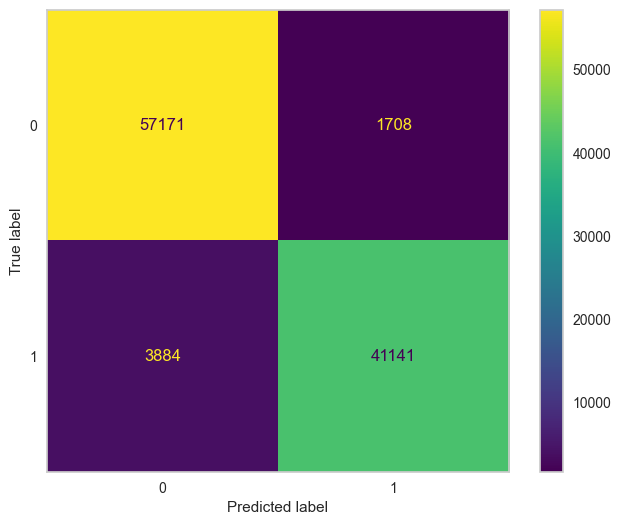

In [75]:
cm_train = confusion_matrix(y_train, predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots(figsize=(8,6)) 
disp.plot(ax=ax, cmap='viridis') 
plt.grid(False) 
plt.show()

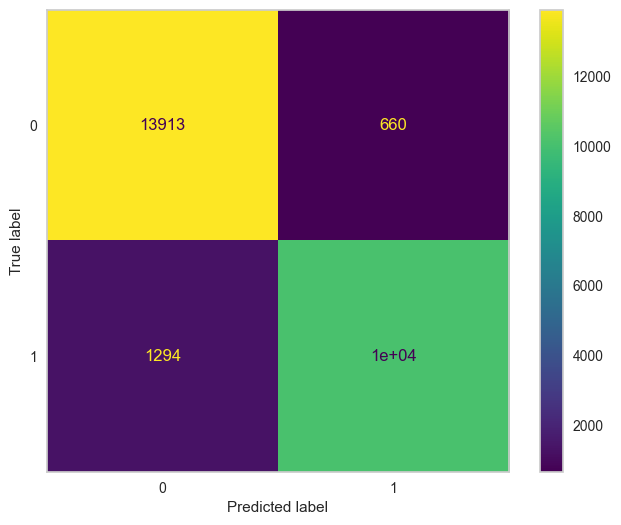

In [76]:
cm_test = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
fig, ax = plt.subplots(figsize=(8,6)) 
disp.plot(ax=ax, cmap='viridis') 
plt.grid(False) 
plt.show()

From the matrix, the model fairly predict the true positive (satisfied) and true negative (neutral or dissatisfied), with small rate of false positive and false negative

#### Evaluation Metrics

In [77]:
print('Train')
print(classification_report(y_train, predict_train))
print('')

print('Test')
print(classification_report(y_test, predict_test))

Train
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     58879
           1       0.96      0.91      0.94     45025

    accuracy                           0.95    103904
   macro avg       0.95      0.94      0.94    103904
weighted avg       0.95      0.95      0.95    103904


Test
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     14573
           1       0.94      0.89      0.91     11403

    accuracy                           0.92     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.92      0.92     25976



as our positive class is 1 (satisfied), we have decent score of f1, with 0.94 on train and 0.91 on test

#### Adding Result to Dictionary

In [78]:
model_report = {}
model_report = mla.performance_report(model_report, y_train, predict_train, y_test, predict_test, "KNN Classifier", target_parameter='f1_score')
pd.DataFrame(model_report)

,KNN Classifier
train - f1_score,0.936363
test - f1_score,0.911871


Adding the value for comparison with later model

#### Conclusion for KNN Classifier

- Good fit (~0.90) with a slight higher score on train than test

### SVM

#### Prediction

In [79]:
predict_train = SVM_pipeline.predict(x_train)
predict_test = SVM_pipeline.predict(x_test)
predict_train

array([0, 0, 1, ..., 0, 0, 0], shape=(103904,))

#### Confusion Matrix

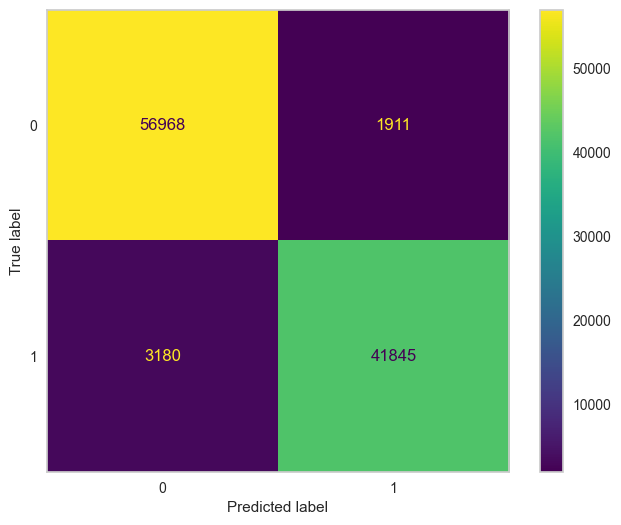

In [80]:
cm_train = confusion_matrix(y_train, predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots(figsize=(8,6)) 
disp.plot(ax=ax, cmap='viridis') 
plt.grid(False) 
plt.show()

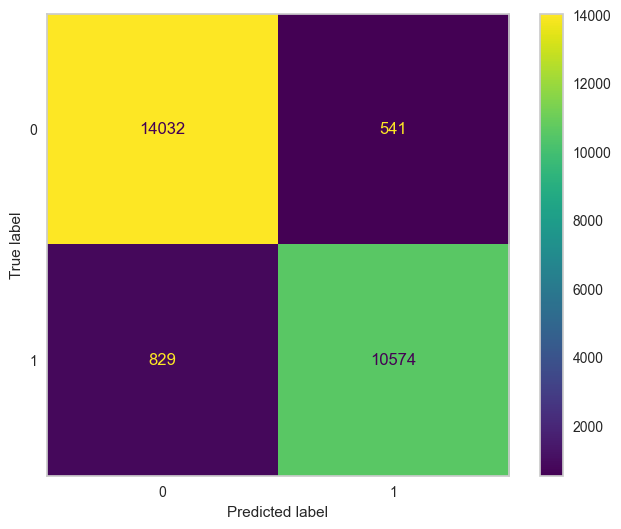

In [81]:
cm_test = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
fig, ax = plt.subplots(figsize=(8,6)) 
disp.plot(ax=ax, cmap='viridis') 
plt.grid(False) 
plt.show()

From the matrix, the model fairly predict the true positive (satisfied) and true negative (neutral or dissatisfied), with small rate of false positive and false negative

#### Evaluation Metrics

In [82]:
print('Train')
print(classification_report(y_train, predict_train))
print('')

print('Test')
print(classification_report(y_test, predict_test))

Train
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     58879
           1       0.96      0.93      0.94     45025

    accuracy                           0.95    103904
   macro avg       0.95      0.95      0.95    103904
weighted avg       0.95      0.95      0.95    103904


Test
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14573
           1       0.95      0.93      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



as our positive class is 1 (satisfied), we have better f1 scores than previous model, scoring 0.01 to 0.02 higher on train and test respectively

#### Adding Result to Dictionary

In [83]:
model_report = mla.performance_report(model_report, y_train, predict_train, y_test, predict_test, "SVM", target_parameter='f1_score')
pd.DataFrame(model_report)

,KNN Classifier,SVM
train - f1_score,0.936363,0.942657
test - f1_score,0.911871,0.939160


Adding the value for comparison with later model

#### Conclusion for SVM Classifier

- Good fit and the best model so far, despite the heavy computational (the prediction took 2 minutes when the rest took 2 seconds)

### Decision Tree

#### Prediction

In [84]:
predict_train = DT_pipeline.predict(x_train)
predict_test = DT_pipeline.predict(x_test)
predict_train

array([0, 0, 1, ..., 0, 0, 0], shape=(103904,))

#### Confusion Matrix

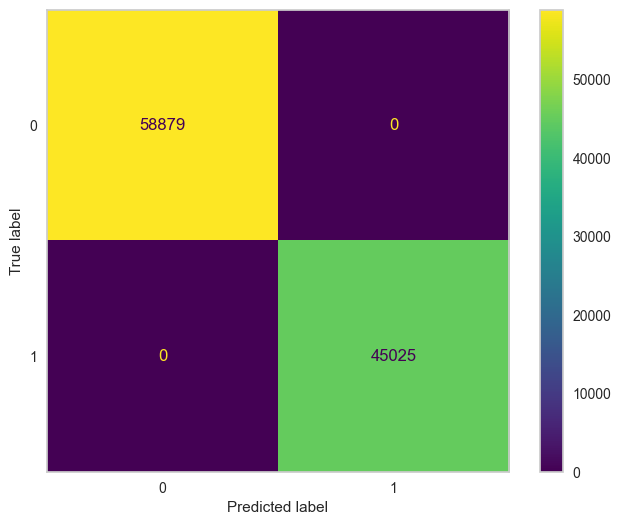

In [85]:
cm_train = confusion_matrix(y_train, predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots(figsize=(8,6)) 
disp.plot(ax=ax, cmap='viridis') 
plt.grid(False) 
plt.show()

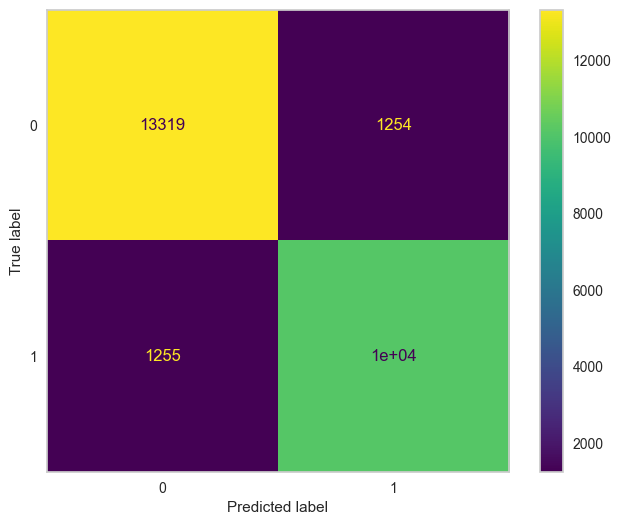

In [86]:
cm_test = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
fig, ax = plt.subplots(figsize=(8,6)) 
disp.plot(ax=ax, cmap='viridis') 
plt.grid(False) 
plt.show()

From the matrix, the model fairly predict the true positive (satisfied) and true negative (neutral or dissatisfied), with small rate of false positive and false negative

#### Evaluation Metrics

In [87]:
print('Train')
print(classification_report(y_train, predict_train))
print('')

print('Test')
print(classification_report(y_test, predict_test))

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58879
           1       1.00      1.00      1.00     45025

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904


Test
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     14573
           1       0.89      0.89      0.89     11403

    accuracy                           0.90     25976
   macro avg       0.90      0.90      0.90     25976
weighted avg       0.90      0.90      0.90     25976



as our positive class is 1 (satisfied), we have better f1 scores on train, reaching perfect 1.00 and only 0.89 on test, showing the model is overfit

#### Adding Result to Dictionary

In [88]:
model_report = mla.performance_report(model_report, y_train, predict_train, y_test, predict_test, "Decision Tree", target_parameter='f1_score')
pd.DataFrame(model_report)

,KNN Classifier,SVM,Decision Tree
train - f1_score,0.936363,0.942657,1.00000
test - f1_score,0.911871,0.939160,0.88998


Adding the value for comparison with later model

#### Conclusion for Decision Tree

- the model is overfit, with 100% correct answer on train and only 0.89 on test.

### Random Forest

#### Prediction

In [89]:
predict_train = RF_pipeline.predict(x_train)
predict_test = RF_pipeline.predict(x_test)
predict_train

array([0, 0, 1, ..., 0, 0, 0], shape=(103904,))

#### Confusion Matrix

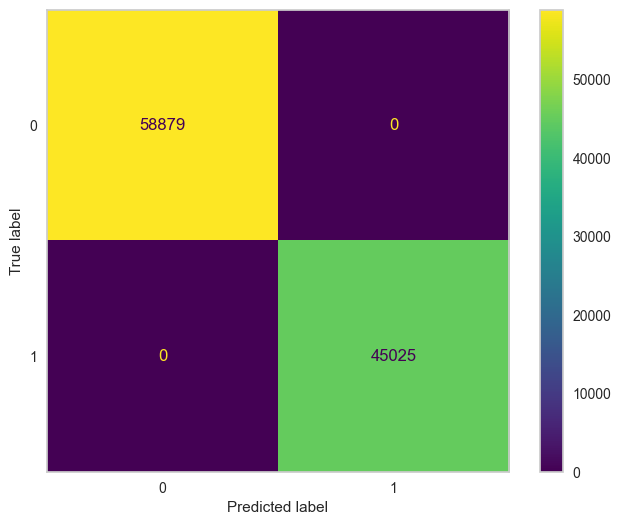

In [90]:
cm_train = confusion_matrix(y_train, predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots(figsize=(8,6)) 
disp.plot(ax=ax, cmap='viridis') 
plt.grid(False) 
plt.show()

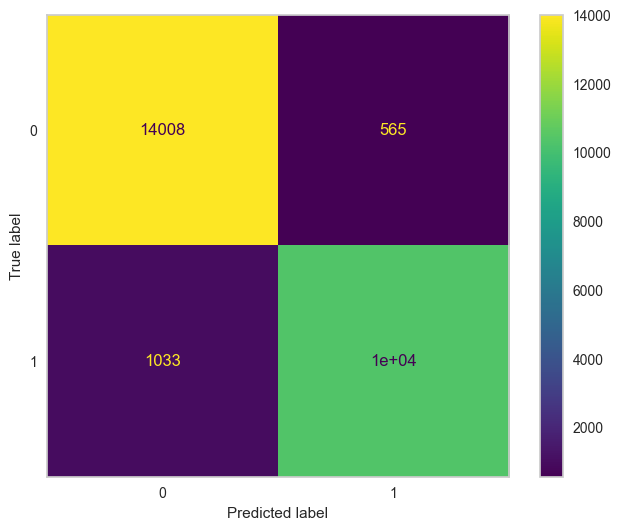

In [91]:
cm_test = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
fig, ax = plt.subplots(figsize=(8,6)) 
disp.plot(ax=ax, cmap='viridis') 
plt.grid(False) 
plt.show()

From the matrix, the model fairly predict the true positive (satisfied) and true negative (neutral or dissatisfied), with perfect classification on train and small rate of false positive and false negative on test.

#### Evaluation Metrics

In [92]:
print('Train')
print(classification_report(y_train, predict_train))
print('')

print('Test')
print(classification_report(y_test, predict_test))

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58879
           1       1.00      1.00      1.00     45025

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904


Test
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14573
           1       0.95      0.91      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



as our positive class is 1 (satisfied), we have better f1 scores on train, reaching perfect 1.00 and only 0.93 on test, showing the model is overfit despite its better than previous.

#### Adding Result to Dictionary

In [93]:
model_report = mla.performance_report(model_report, y_train, predict_train, y_test, predict_test, "Random Forest", target_parameter='f1_score')
pd.DataFrame(model_report)

,KNN Classifier,SVM,Decision Tree,Random Forest
train - f1_score,0.936363,0.942657,1.00000,1.000000
test - f1_score,0.911871,0.939160,0.88998,0.928463


Adding the value for comparison with later model

#### Conclusion for Random Forest

- Model is still overfit, despite its not that big, or problematic, with 100% on train and 0.92 on test

### XGBoost

#### Prediction

In [94]:
predict_train = XGB_pipeline.predict(x_train)
predict_test = XGB_pipeline.predict(x_test)
predict_train

array([0, 0, 1, ..., 0, 0, 0], shape=(103904,))

#### Confusion Matrix

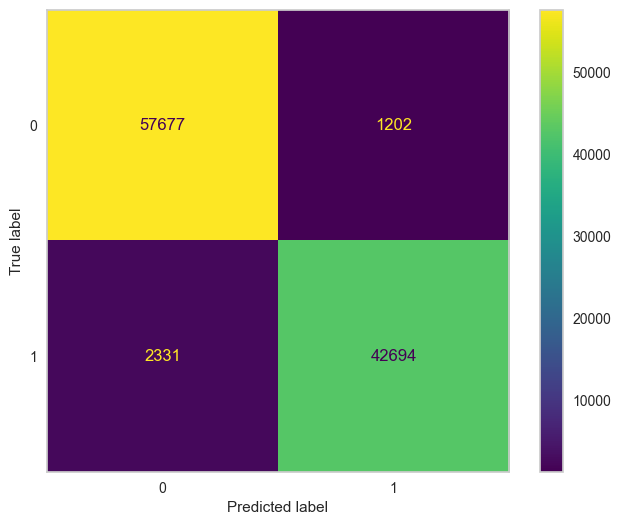

In [95]:
cm_train = confusion_matrix(y_train, predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots(figsize=(8,6)) 
disp.plot(ax=ax, cmap='viridis') 
plt.grid(False) 
plt.show()

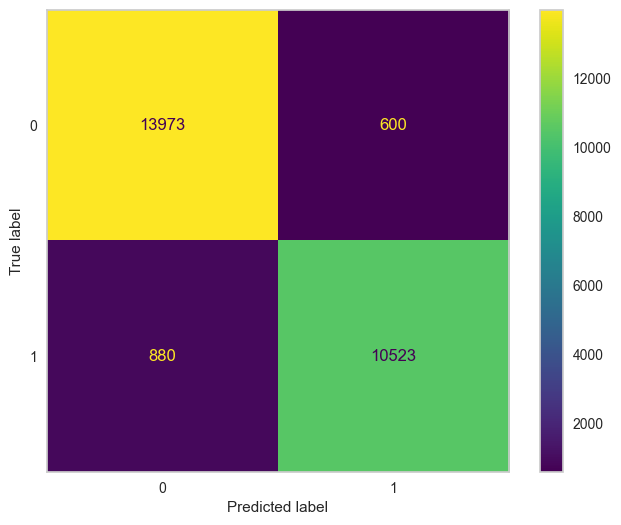

In [96]:
cm_test = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
fig, ax = plt.subplots(figsize=(8,6)) 
disp.plot(ax=ax, cmap='viridis') 
plt.grid(False) 
plt.show()

From the matrix, the model fairly predict the true positive (satisfied) and true negative (neutral or dissatisfied), with small rate of false positive and false negative.

#### Evaluation Metrics

In [97]:
print('Train')
print(classification_report(y_train, predict_train))
print('')

print('Test')
print(classification_report(y_test, predict_test))

Train
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     58879
           1       0.97      0.95      0.96     45025

    accuracy                           0.97    103904
   macro avg       0.97      0.96      0.97    103904
weighted avg       0.97      0.97      0.97    103904


Test
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14573
           1       0.95      0.92      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



as our positive class is 1 (satisifed), the model perform really well, with 0.96 on train and 0.93 on test

#### Adding Result to Dictionary

In [98]:
model_report = mla.performance_report(model_report, y_train, predict_train, y_test, predict_test, "XGBoost", target_parameter='f1_score')
pd.DataFrame(model_report)

,KNN Classifier,SVM,Decision Tree,Random Forest,XGBoost
train - f1_score,0.936363,0.942657,1.00000,1.000000,0.960268
test - f1_score,0.911871,0.939160,0.88998,0.928463,0.934298


Adding the value for comparison with later model

#### Conclusion for XGBoost

- so far the second best after SVM with 0.005 score difference, showing the model fitting better to train with 0.02 score higher.

## Comparison Between Models

In [99]:
pd.DataFrame(cv_report)

,KNN Classifier,SVM Classifier,Decision Tree,Random Forest,XGBoost
f1 - Mean - Cross Validation,0.907666,0.936741,0.887497,0.923485,0.932669
f1 - Std - Cross Validation,0.003028,0.00135,0.001662,0.00203,0.001675
f1 - Range - Cross Validation,0.9046 - 0.9107,0.9354 - 0.9381,0.8858 - 0.8892,0.9215 - 0.9255,0.9310 - 0.9343


In [100]:
pd.DataFrame(model_report)

,KNN Classifier,SVM,Decision Tree,Random Forest,XGBoost
train - f1_score,0.936363,0.942657,1.00000,1.000000,0.960268
test - f1_score,0.911871,0.939160,0.88998,0.928463,0.934298


Based on both cross-validation and train-test performance metrics (f1-score), the following conclusions can be drawn:

- **XGBoost**:
  - **Cross-validation Mean f1-score**: 0.9327 (2nd highest after SVM)
  - **Test f1-score**: 0.9343
  - **Train f1-score**: 0.9603
  - **Stability**: Very small std (±0.0017), range from 0.9310 to 0.9343, indicating consistent performance across folds.
  - **Conclusion**: Showing only a small drop between train and test score, suggesting **minimal overfitting**. It also performs almost as well as SVM but with way less time taken to train and cross validate.

- **SVM**:
  - **Cross-validation Mean f1-score**: 0.9367 (highest)
  - **Test f1-score**: 0.9392 (highest)
  - **Train f1-score**: 0.9427
  - **Stability**: Very low std (±0.0013) and tight score range.
  - **Conclusion**: Best performing in terms of score and consistency. However, **significant training time** makes it less practical for large-scale deployment or retraining.

- **Random Forest**:
  - **Cross-validation Mean f1-score**: 0.9235
  - **Test f1-score**: 0.9285
  - **Train f1-score**: 1.0000 (indicative of overfitting)
  - **Conclusion**: Still performs well but tends to **overfit**, as seen from perfect training score. 

- **KNN**:
  - **Cross-validation Mean f1-score**: 0.9077
  - **Test f1-score**: 0.9119
  - **Train f1-score**: 0.9364
  - **Conclusion**: Lightweight and simple but **lower generalization performance** compared to tree-based and SVM models.

- **Decision Tree**:
  - **Cross-validation Mean f1-score**: 0.8875 (lowest)
  - **Test f1-score**: 0.8900
  - **Train f1-score**: 1.0000
  - **Conclusion**: **Highly overfit** and lowest cross-validated performance. Not recommended as a final model.

Algorithm that will be used for Hyperparameter Tuning: **XGBoost**
- Offers **excellent trade-off** between performance, consistency, and scalability.
- Slightly less score than SVM, but significantly more **practical** for deployment and retraining.

---
# Hyperparameter Tuning

## Parameter Definition

Explanation of hyperparameter
| Hyperparameter             | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| `n_estimators`            | Number of boosting rounds (trees)                                           |
| `max_depth`               | Maximum depth of a tree                                                     |
| `learning_rate`           | Step size shrinkage to prevent overfitting                                  |
| `subsample`               | Fraction of training data used for each tree                                |
| `colsample_bytree`        | Fraction of features used per tree                                          |
| `gamma`                   | Minimum loss reduction required to make a further partition                 |
| `reg_alpha`               | L1 regularization term on weights                                           |
| `reg_lambda`              | L2 regularization term on weights                                           |

In [101]:
param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(3, 10),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__subsample': uniform(0.7, 0.3),
    'classifier__colsample_bytree': uniform(0.7, 0.3),
    'classifier__gamma': uniform(0, 5),
    'classifier__reg_alpha': uniform(0, 1),
    'classifier__reg_lambda': uniform(0, 1)
}

## Hyperparameter Tuning

Using randomsearch, with 50 different combination of hyperparameter and 5 cross validation, totalling 250 models.

In [102]:
random_search_xgb = RandomizedSearchCV(
    estimator=XGB_pipeline,
    param_distributions=param_dist,
    n_iter=50,                     
    scoring='f1',                  
    cv=5,
    verbose=1,
    random_state=randomstate,
    n_jobs=-1
)
random_search_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('numeric_pca',
                                                                               Pipeline(steps=[('impute_encode',
                                                                                                ColumnTransformer(transformers=[('num_disc',
                                                                                                                                 KNNImputer(n_neighbors=3),
                                                                                                                                 ['Age',
                                                                                                                                  'Flight '
                                                                                                                                  'Distance',
                                                                                                                                  'Departure '
                                                                                                                                  'Delay '
                                                                                                                                  'in '
                                                                                                                                  'Minutes',
                                                                                                                                  'Arrival '
                                                                                                                                  'Delay '
                                                                                                                                  'in '
                                                                                                                                  'Minutes',
                                                                                                                                  'Inflight '
                                                                                                                                  'wifi '
                                                                                                                                  'service',
                                                                                                                                  'Departure/Arrival '...
                                        'classifier__reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013E9AFBF8F0>,
                                        'classifier__reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013E9AC769F0>,
                                        'classifier__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013EA7EB8980>},
                   random_state=42, scoring='f1', verbose=1)

The hyperparameter tuning only took 7 minutes and 42 seconds. *(experience may vary according to the cpu power and randomstate)*

## K Fold Validation Score 

preview of the 5 best parameter, based on the 'f1 score' average out of 5 split. <br>
the best model have the average f1 score of 0.93, with the range of 0.936 to 0.939 between all 5 folds. <br>
the best model have standard deviation of 0.0009, showing that the model is stable between all 5 split.

In [103]:
cross_val_res = pd.DataFrame(random_search_xgb.cv_results_)

cross_val_res[['params', 'split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score').head(5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
43,{'classifier__colsample_bytree': 0.92321279289...,0.936607,0.938212,0.938914,0.939517,0.938449,0.938340,0.000974,1
30,{'classifier__colsample_bytree': 0.84816811455...,0.936567,0.938699,0.937898,0.939650,0.938172,0.938197,0.001011,2
23,{'classifier__colsample_bytree': 0.93950353749...,0.935937,0.938969,0.937849,0.939192,0.938835,0.938156,0.001201,3
2,{'classifier__colsample_bytree': 0.75454749016...,0.935810,0.937080,0.937761,0.938361,0.937496,0.937302,0.000854,4
31,{'classifier__colsample_bytree': 0.81031474091...,0.934537,0.936896,0.936830,0.937790,0.936876,0.936586,0.001085,5


## Best Parameter and Model

In [104]:
random_search_xgb.best_params_

{'classifier__colsample_bytree': np.float64(0.9232127928997346),
 'classifier__gamma': np.float64(1.254302636733306),
 'classifier__learning_rate': np.float64(0.06530010229941101),
 'classifier__max_depth': 8,
 'classifier__n_estimators': 378,
 'classifier__reg_alpha': np.float64(0.42831447494010777),
 'classifier__reg_lambda': np.float64(0.6884999007653664),
 'classifier__subsample': np.float64(0.7174580786525331)}

Our best hyperparameters for improving the f1 score using **XGBoost** are:

- **n_estimators - 378**: This is the number of boosting rounds (trees). More estimators can improve learning but also increase training time and risk of overfitting.
- **max_depth - 8**: Controls the maximum depth of each tree. Deeper trees can capture more complex patterns but may overfit.
- **learning_rate - 0.0653**: A smaller learning rate means each tree contributes less, requiring more trees to fit, which helps with generalization.
- **subsample - 0.7175**: Only ~71.75% of the training data is used to build each tree, reducing overfitting and improving generalization.
- **colsample_bytree - 0.9232**: ~92.32% of the features are randomly selected to train each tree, which adds randomness and robustness.
- **gamma - 1.2543**: A node is split only if the resulting split gives a reduction in the loss function greater than this value, making the model more conservative.
- **reg_alpha - 0.4283**: Adds L1 regularization, which can help with feature selection and sparsity.
- **reg_lambda - 0.6885**: Adds L2 regularization to reduce model complexity and overfitting.

Saving our best model in variable

In [105]:
best_model_xgb = random_search_xgb.best_estimator_

## Model Evaluation

### XGBoost after Hyperparameter Tuning

#### Prediction

In [106]:
predict_train = best_model_xgb.predict(x_train) #type:ignore
predict_test = best_model_xgb.predict(x_test) #type:ignore
predict_train

array([0, 0, 1, ..., 0, 0, 0], shape=(103904,))

#### Confusion Matrix

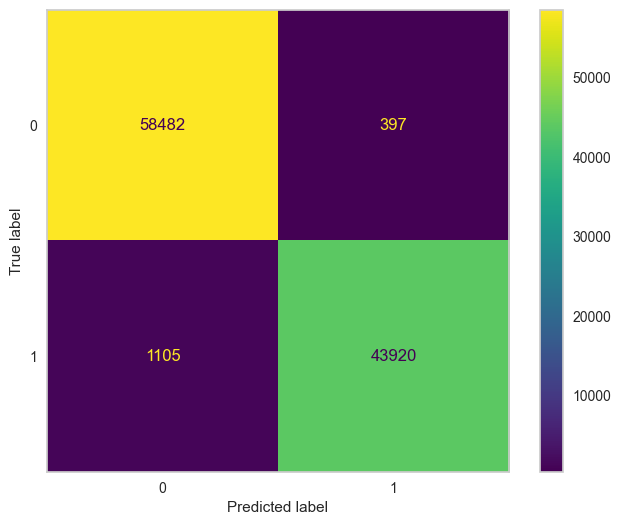

In [107]:
cm_train = confusion_matrix(y_train, predict_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots(figsize=(8,6)) 
disp.plot(ax=ax, cmap='viridis') 
plt.grid(False) 
plt.show()

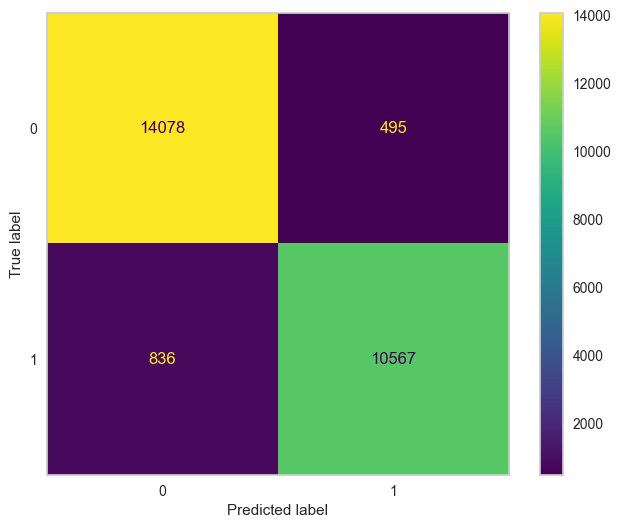

In [108]:
cm_test = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
fig, ax = plt.subplots(figsize=(8,6)) 
disp.plot(ax=ax, cmap='viridis') 
plt.grid(False) 
plt.show()

From the matrix, the model fairly predict the true positive (satisfied) and true negative (neutral or dissatisfied), with small rate of false positive and false negative.

#### Evaluation Metrics

In [109]:
print('Train')
print(classification_report(y_train, predict_train))
print('')

print('Test')
print(classification_report(y_test, predict_test))

Train
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     58879
           1       0.99      0.98      0.98     45025

    accuracy                           0.99    103904
   macro avg       0.99      0.98      0.99    103904
weighted avg       0.99      0.99      0.99    103904


Test
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14573
           1       0.96      0.93      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



as our positive class is 1 (satisifed), the model perform improved compared to base model, with 0.98 on train and 0.94 on test

#### Adding Result to Dictionary

In [110]:
model_report = mla.performance_report(model_report, y_train, predict_train, y_test, predict_test, "XGBoost Hyperparameter", target_parameter='f1_score')
pd.DataFrame(model_report)

,KNN Classifier,SVM,Decision Tree,Random Forest,XGBoost,XGBoost Hyperparameter
train - f1_score,0.936363,0.942657,1.00000,1.000000,0.960268,0.983188
test - f1_score,0.911871,0.939160,0.88998,0.928463,0.934298,0.940752


## Model Conclusion:
- **Best Overall Model: Tuned XGBoost**
  - Achieved the highest F1-score on the test set (**0.9408**) while maintaining strong training performance.
  - The tuning significantly improved generalization, outperforming all other models.
  - The model is stable between all 5 crossvalidattion with only 0.0009 standard deviation


- **SVM** also performed very well with balanced train and test scores (**0.9427 / 0.9392**), showing great stability.
- **Decision Tree** should be avoided due to clear overfitting (**1.0000 / 0.8900**).
- **Random Forest** is a solid option but slightly overfits.
- **KNN** is decent, but slightly behind others in generalization performance.

---
# Model Saving

based on our model testing, we store the XGBoost model after hyperparameter testing for our prediction. Storing SVM as well for backup

In [ ]:
with open('model_xgb.pkl', 'wb') as file:
  pickle.dump(best_model_xgb, file)
  
with open('model_svm.pkl', 'wb') as file1:
  pickle.dump(SVM_pipeline, file1)
  

"with open('model_svm_hyper.pkl', 'wb') as file2:\n  pickle.dump(best_model_svm, file2)"

---
# Conclusion & Recommendation

## Project Conclusion

This project has explored the dataset and pulled out several insight such as :
- **Class Imbalance**: The `satisfaction` column is imbalanced, with approximately **57%** labeled as "Neutral or Dissatisfied" and **43%** as "Satisfied".
- **Both Gender** have same satisfaction, with female slightly higher on disatisfaction.
- **Travel class** significantly affects satisfaction—Business class passengers are much more satisfied than Economy.
- **Flight delays**, while typically low, occasionally spike across all distance ranges, especially in long-haul flights.
- **Check-in service** rating is a strong predictor of satisfaction—higher ratings align with more satisfied customers.
- **Online boarding, inflight entertainment, seat comfort, and cleanliness** are the most influential features driving satisfaction.
- **Improving service quality** in key areas can lead to substantial increases in overall passenger satisfaction.

This project also successfully built a classification model to predict whether a passenger is satisfied with the service based on the survey they filled. After testing several algorithms and tuning hyperparameters, XGBoost with proper hyperparameter showed significant improvement in f1 score.

- **Significant F1 Score Improvement**: F1 score improved from **0.91** (default XGBoost) to **0.94** after hyperparameter tuning.
- **Strong Generalization**: The gap between train (0.983) and test (0.941) F1 scores is small, indicating the model generalizes well and is **not overfitting**.
- **Consistent Cross-Validation Performance**: Cross-validation results show stable performance with a mean F1 score of **0.937** and a low standard deviation, confirming the model's **robustness**.
- **XGBoost Justified Despite Cost**: While XGBoost is computationally heavier compared to other models, it is significantly lighter than SVM models.

Now the model can classify the satisfaction of pasenger for the company, by understanding what feature and service actually matter to the passenger, the airline can improve the quality and also increase the general satisfaction of the passengers. in turn several passenger might return or even recommend it to new passenger.

## Project Recommendation

Several Recommendation for this specific case :

1. Hyperparameter SVM Classifier <br>
As the default bare model already performing really well, if the machine or the resource is available, tuning this model might get even higher result compared to XGB, despite the cost will grow exponentially compared to XGBoost. <br> for hyperparameter tuning on SVM, the barebone code has been written and available on the [archive](archive.ipynb).

2. PCA Selection.<br> 
As all the ordinal and discrete is used for PCA to reduce overfitting, not using PCA at all might improve the model, as PCA assume linearity, using PCA (or even OrdinalEncoder) might ruin the difference, as business is considered twice as better as eco plus after encoding (with 2 and 1 index), which might not be true in real life itself.
- [A Guide to Principal Component Analysis (PCA) for Machine Learning](https://www.keboola.com/blog/pca-machine-learning#:~:text=PCA%20assumes%20a%20linear%20relationship,methods%20such%20as%20log%20transforms.)
